In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(-3111.6760)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 9628.78181  validloss 145387.74301±0.00000  bestvalidloss 145387.74301  last_update 0
train: iter 1  trainloss 1602.82315  validloss 1308.59082±0.00000  bestvalidloss 1308.59082  last_update 0
train: iter 2  trainloss 1211.60794  validloss 1882.29360±0.00000  bestvalidloss 1308.59082  last_update 1
train: iter 3  trainloss 1037.39418  validloss 1270.23140±0.00000  bestvalidloss 1270.23140  last_update 0
train: iter 4  trainloss 1049.77237  validloss 1131.20697±0.00000  bestvalidloss 1131.20697  last_update 0
train: iter 5  trainloss 942.96856  validloss 1025.91362±0.00000  bestvalidloss 1025.91362  last_update 0
train: iter 6  trainloss 901.62190  validloss 907.96852±0.00000  bestvalidloss 907.96852  last_update 0
train: iter 7  trainloss 865.15896  validloss 889.73529±0.00000  bestvalidloss 889.73529  last_update 0
train: iter 8  trainloss 837.50042  validloss 871.04382±0.00000  bestvalidloss 871.04382  last_update 0
train: iter 9  trainloss

train: iter 78  trainloss -742.02817  validloss -725.76196±0.00000  bestvalidloss -725.76196  last_update 0
train: iter 79  trainloss -695.48756  validloss -615.90422±0.00000  bestvalidloss -725.76196  last_update 1
train: iter 80  trainloss -494.16154  validloss -468.33003±0.00000  bestvalidloss -725.76196  last_update 2
train: iter 81  trainloss -674.88547  validloss -548.54527±0.00000  bestvalidloss -725.76196  last_update 3
train: iter 82  trainloss -680.38605  validloss -602.75893±0.00000  bestvalidloss -725.76196  last_update 4
train: iter 83  trainloss -782.48152  validloss -692.98703±0.00000  bestvalidloss -725.76196  last_update 5
train: iter 84  trainloss -750.47007  validloss -704.46642±0.00000  bestvalidloss -725.76196  last_update 6
train: iter 85  trainloss -716.97749  validloss -612.64568±0.00000  bestvalidloss -725.76196  last_update 7
train: iter 86  trainloss -804.95307  validloss -741.85679±0.00000  bestvalidloss -741.85679  last_update 0
train: iter 87  trainloss -7

train: iter 154  trainloss -1012.52669  validloss -901.55830±0.00000  bestvalidloss -1053.19674  last_update 1
train: iter 155  trainloss -645.35456  validloss -807.54348±0.00000  bestvalidloss -1053.19674  last_update 2
train: iter 156  trainloss -613.91693  validloss -467.96801±0.00000  bestvalidloss -1053.19674  last_update 3
train: iter 157  trainloss -654.95817  validloss -212.02460±0.00000  bestvalidloss -1053.19674  last_update 4
train: iter 158  trainloss -937.53009  validloss -822.39913±0.00000  bestvalidloss -1053.19674  last_update 5
train: iter 159  trainloss -970.74425  validloss -901.43059±0.00000  bestvalidloss -1053.19674  last_update 6
train: iter 160  trainloss -1021.25822  validloss -937.10359±0.00000  bestvalidloss -1053.19674  last_update 7
train: iter 161  trainloss -957.23495  validloss -982.16740±0.00000  bestvalidloss -1053.19674  last_update 8
train: iter 162  trainloss -925.61025  validloss -813.19858±0.00000  bestvalidloss -1053.19674  last_update 9
train: i

train: iter 229  trainloss -1258.22914  validloss -1171.80625±0.00000  bestvalidloss -1227.30662  last_update 6
train: iter 230  trainloss -1254.26547  validloss -1241.31862±0.00000  bestvalidloss -1241.31862  last_update 0
train: iter 231  trainloss -1138.46404  validloss -1192.89447±0.00000  bestvalidloss -1241.31862  last_update 1
train: iter 232  trainloss -1189.56068  validloss -1143.29841±0.00000  bestvalidloss -1241.31862  last_update 2
train: iter 233  trainloss -1248.49881  validloss -1181.12134±0.00000  bestvalidloss -1241.31862  last_update 3
train: iter 234  trainloss -1240.89950  validloss -1227.09728±0.00000  bestvalidloss -1241.31862  last_update 4
train: iter 235  trainloss -1193.19250  validloss -1150.65998±0.00000  bestvalidloss -1241.31862  last_update 5
train: iter 236  trainloss -1207.72840  validloss -1097.60614±0.00000  bestvalidloss -1241.31862  last_update 6
train: iter 237  trainloss -1049.53756  validloss -1146.11715±0.00000  bestvalidloss -1241.31862  last_u

train: iter 303  trainloss -1174.69213  validloss -1226.35614±0.00000  bestvalidloss -1388.17607  last_update 12
train: iter 304  trainloss -1387.45459  validloss -1318.47112±0.00000  bestvalidloss -1388.17607  last_update 13
train: iter 305  trainloss -1411.38744  validloss -1371.19371±0.00000  bestvalidloss -1388.17607  last_update 14
train: iter 306  trainloss -1244.40435  validloss -1390.94641±0.00000  bestvalidloss -1390.94641  last_update 0
train: iter 307  trainloss -1307.53243  validloss -1353.02233±0.00000  bestvalidloss -1390.94641  last_update 1
train: iter 308  trainloss -1361.70063  validloss -1284.65811±0.00000  bestvalidloss -1390.94641  last_update 2
train: iter 309  trainloss -1383.91832  validloss -1361.94177±0.00000  bestvalidloss -1390.94641  last_update 3
train: iter 310  trainloss -1242.22861  validloss -1360.10658±0.00000  bestvalidloss -1390.94641  last_update 4
train: iter 311  trainloss -1376.07108  validloss -1278.22784±0.00000  bestvalidloss -1390.94641  las

train: iter 377  trainloss -1416.06228  validloss -1520.48298±0.00000  bestvalidloss -1520.48298  last_update 0
train: iter 378  trainloss -1458.81197  validloss -1347.67050±0.00000  bestvalidloss -1520.48298  last_update 1
train: iter 379  trainloss -1390.14422  validloss -1474.41425±0.00000  bestvalidloss -1520.48298  last_update 2
train: iter 380  trainloss -1513.74353  validloss -1463.43217±0.00000  bestvalidloss -1520.48298  last_update 3
train: iter 381  trainloss -1525.74631  validloss -1504.98348±0.00000  bestvalidloss -1520.48298  last_update 4
train: iter 382  trainloss -1536.55518  validloss -1484.40366±0.00000  bestvalidloss -1520.48298  last_update 5
train: iter 383  trainloss -1355.77686  validloss -1347.68488±0.00000  bestvalidloss -1520.48298  last_update 6
train: iter 384  trainloss -1492.41089  validloss -1398.32019±0.00000  bestvalidloss -1520.48298  last_update 7
train: iter 385  trainloss -1538.53041  validloss -1508.55985±0.00000  bestvalidloss -1520.48298  last_u

train: iter 450  trainloss -1516.01860  validloss -1297.72803±0.00000  bestvalidloss -1546.14307  last_update 32
train: iter 451  trainloss -1609.99011  validloss -1558.81552±0.00000  bestvalidloss -1558.81552  last_update 0
train: iter 452  trainloss -1634.50649  validloss -1581.73737±0.00000  bestvalidloss -1581.73737  last_update 0
train: iter 453  trainloss -1165.00519  validloss -1365.38703±0.00000  bestvalidloss -1581.73737  last_update 1
train: iter 454  trainloss -1137.53953  validloss -1384.69094±0.00000  bestvalidloss -1581.73737  last_update 2
train: iter 455  trainloss -1198.44268  validloss -868.92381±0.00000  bestvalidloss -1581.73737  last_update 3
train: iter 456  trainloss -1375.14048  validloss -1300.19933±0.00000  bestvalidloss -1581.73737  last_update 4
train: iter 457  trainloss -1471.23514  validloss -1393.79107±0.00000  bestvalidloss -1581.73737  last_update 5
train: iter 458  trainloss -1528.43276  validloss -1463.81905±0.00000  bestvalidloss -1581.73737  last_u

train: iter 523  trainloss -1570.50996  validloss -1441.19163±0.00000  bestvalidloss -1581.73737  last_update 71
train: iter 524  trainloss -1532.94949  validloss -1536.15614±0.00000  bestvalidloss -1581.73737  last_update 72
train: iter 525  trainloss -1501.29975  validloss -1518.30818±0.00000  bestvalidloss -1581.73737  last_update 73
train: iter 526  trainloss -1555.46399  validloss -1333.95991±0.00000  bestvalidloss -1581.73737  last_update 74
train: iter 527  trainloss -1639.70131  validloss -1538.74412±0.00000  bestvalidloss -1581.73737  last_update 75
train: iter 528  trainloss -1595.35965  validloss -1570.06972±0.00000  bestvalidloss -1581.73737  last_update 76
train: iter 529  trainloss -1437.96778  validloss -1567.77242±0.00000  bestvalidloss -1581.73737  last_update 77
train: iter 530  trainloss -1616.42636  validloss -1392.93255±0.00000  bestvalidloss -1581.73737  last_update 78
train: iter 531  trainloss -1468.79100  validloss -1566.67436±0.00000  bestvalidloss -1581.73737

train: iter 597  trainloss -1484.96624  validloss -1287.54766±0.00000  bestvalidloss -1608.05811  last_update 20
train: iter 598  trainloss -1654.89174  validloss -1561.15212±0.00000  bestvalidloss -1608.05811  last_update 21
train: iter 599  trainloss -1611.10097  validloss -1563.46480±0.00000  bestvalidloss -1608.05811  last_update 22
train: iter 600  trainloss -1555.75324  validloss -1580.52094±0.00000  bestvalidloss -1608.05811  last_update 23
train: iter 601  trainloss -1368.40466  validloss -1584.63467±0.00000  bestvalidloss -1608.05811  last_update 24
train: iter 602  trainloss -1599.37994  validloss -1510.70138±0.00000  bestvalidloss -1608.05811  last_update 25
train: iter 603  trainloss -1664.51679  validloss -1597.46528±0.00000  bestvalidloss -1608.05811  last_update 26
train: iter 604  trainloss -1559.15238  validloss -1602.72633±0.00000  bestvalidloss -1608.05811  last_update 27
train: iter 605  trainloss -1628.66292  validloss -1535.23027±0.00000  bestvalidloss -1608.05811

train: iter 670  trainloss -1417.13464  validloss -1161.87293±0.00000  bestvalidloss -1624.07838  last_update 50
train: iter 671  trainloss -1658.47343  validloss -1549.76625±0.00000  bestvalidloss -1624.07838  last_update 51
train: iter 672  trainloss -1665.71521  validloss -1580.08807±0.00000  bestvalidloss -1624.07838  last_update 52
train: iter 673  trainloss -1625.07437  validloss -1551.32353±0.00000  bestvalidloss -1624.07838  last_update 53
train: iter 674  trainloss -1625.39252  validloss -1527.64852±0.00000  bestvalidloss -1624.07838  last_update 54
train: iter 675  trainloss -1595.41447  validloss -1533.95605±0.00000  bestvalidloss -1624.07838  last_update 55
train: iter 676  trainloss -1633.30388  validloss -1436.74462±0.00000  bestvalidloss -1624.07838  last_update 56
train: iter 677  trainloss -1653.00393  validloss -1611.63818±0.00000  bestvalidloss -1624.07838  last_update 57
train: iter 678  trainloss -1641.06470  validloss -1600.24303±0.00000  bestvalidloss -1624.07838

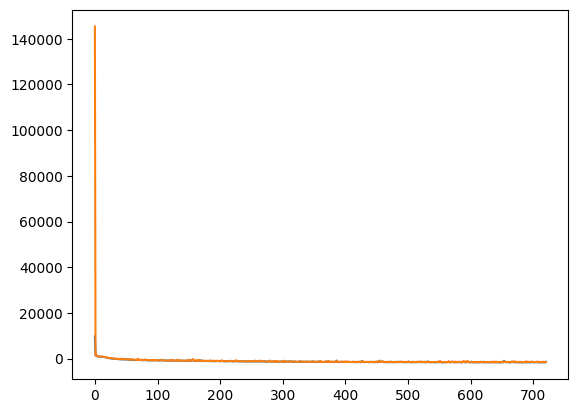

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 9.06906  validloss 9.43641±0.00000  bestvalidloss 9.43641  last_update 0
train: iter 1  trainloss 8.27585  validloss 8.61592±0.00000  bestvalidloss 8.61592  last_update 0
train: iter 2  trainloss 7.62311  validloss 7.88254±0.00000  bestvalidloss 7.88254  last_update 0
train: iter 3  trainloss 7.07153  validloss 7.30516±0.00000  bestvalidloss 7.30516  last_update 0
train: iter 4  trainloss 6.61364  validloss 6.78842±0.00000  bestvalidloss 6.78842  last_update 0
train: iter 5  trainloss 6.20297  validloss 6.35972±0.00000  bestvalidloss 6.35972  last_update 0
train: iter 6  trainloss 5.87493  validloss 5.99271±0.00000  bestvalidloss 5.99271  last_update 0
train: iter 7  trainloss 5.56247  validloss 5.67944±0.00000  bestvalidloss 5.67944  last_update 0
train: iter 8  trainloss 5.31155  validloss 5.40417±0.00000  bestvalidloss 5.40417  last_update 0
train: iter 9  trainloss 5.07535  validloss 5.15574±0.00000  bestvalidloss 5.15574  last_update 0
train: iter 10  trai

train: iter 92  trainloss -0.13128  validloss -0.08569±0.00000  bestvalidloss -0.08569  last_update 0
train: iter 93  trainloss -0.18728  validloss -0.17766±0.00000  bestvalidloss -0.17766  last_update 0
train: iter 94  trainloss -0.21707  validloss -0.15599±0.00000  bestvalidloss -0.17766  last_update 1
train: iter 95  trainloss -0.25401  validloss -0.20957±0.00000  bestvalidloss -0.20957  last_update 0
train: iter 96  trainloss -0.26867  validloss -0.22845±0.00000  bestvalidloss -0.22845  last_update 0
train: iter 97  trainloss -0.32376  validloss -0.23168±0.00000  bestvalidloss -0.23168  last_update 0
train: iter 98  trainloss -0.35347  validloss -0.29175±0.00000  bestvalidloss -0.29175  last_update 0
train: iter 99  trainloss -0.39159  validloss -0.33325±0.00000  bestvalidloss -0.33325  last_update 0
train: iter 100  trainloss -0.41677  validloss -0.38612±0.00000  bestvalidloss -0.38612  last_update 0
train: iter 101  trainloss -0.45883  validloss -0.42036±0.00000  bestvalidloss -0

train: iter 177  trainloss -0.95576  validloss -1.13592±0.00000  bestvalidloss -1.15321  last_update 11
train: iter 178  trainloss -1.00040  validloss -1.10935±0.00000  bestvalidloss -1.15321  last_update 12
train: iter 179  trainloss -1.05998  validloss -1.08950±0.00000  bestvalidloss -1.15321  last_update 13
train: iter 180  trainloss -1.01015  validloss -1.11965±0.00000  bestvalidloss -1.15321  last_update 14
train: iter 181  trainloss -1.01067  validloss -1.08814±0.00000  bestvalidloss -1.15321  last_update 15
train: iter 182  trainloss -1.00223  validloss -1.04431±0.00000  bestvalidloss -1.15321  last_update 16
train: iter 183  trainloss -1.02776  validloss -1.09287±0.00000  bestvalidloss -1.15321  last_update 17
train: iter 184  trainloss -1.03520  validloss -1.08053±0.00000  bestvalidloss -1.15321  last_update 18
train: iter 185  trainloss -0.99189  validloss -1.02213±0.00000  bestvalidloss -1.15321  last_update 19
train: iter 186  trainloss -1.01683  validloss -1.09495±0.00000 

train: iter 259  trainloss -1.00698  validloss -1.00965±0.00000  bestvalidloss -1.21999  last_update 62
train: iter 260  trainloss -1.00321  validloss -1.09617±0.00000  bestvalidloss -1.21999  last_update 63
train: iter 261  trainloss -1.02305  validloss -1.10809±0.00000  bestvalidloss -1.21999  last_update 64
train: iter 262  trainloss -1.02315  validloss -1.11754±0.00000  bestvalidloss -1.21999  last_update 65
train: iter 263  trainloss -1.01064  validloss -1.12985±0.00000  bestvalidloss -1.21999  last_update 66
train: iter 264  trainloss -0.98995  validloss -1.13691±0.00000  bestvalidloss -1.21999  last_update 67
train: iter 265  trainloss -1.00186  validloss -1.11254±0.00000  bestvalidloss -1.21999  last_update 68
train: iter 266  trainloss -1.01714  validloss -1.14164±0.00000  bestvalidloss -1.21999  last_update 69
train: iter 267  trainloss -1.03723  validloss -1.11351±0.00000  bestvalidloss -1.21999  last_update 70
train: iter 268  trainloss -0.99345  validloss -1.15537±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.6967, -3.5203, -2.6963, -5.0048], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 72.59647  validloss 75.94363±0.00000  bestvalidloss 75.94363  last_update 0
train: iter 1  trainloss 53.85311  validloss 59.98156±0.00000  bestvalidloss 59.98156  last_update 0
train: iter 2  trainloss 38.12986  validloss 41.57259±0.00000  bestvalidloss 41.57259  last_update 0
train: iter 3  trainloss 29.13618  validloss 31.04668±0.00000  bestvalidloss 31.04668  last_update 0
train: iter 4  trainloss 23.40203  validloss 24.28565±0.00000  bestvalidloss 24.28565  last_update 0
train: iter 5  trainloss 19.34425  validloss 20.21054±0.00000  bestvalidloss 20.21054  last_update 0
train: iter 6  trainloss 16.38047  validloss 17.17107±0.00000  bestvalidloss 17.17107  last_update 0
train: iter 7  trainloss 14.08745  validloss 14.72715±0.00000  bestvalidloss 14.72715  last_update 0
train: iter 8  trainloss 12.41216  validloss 13.23228±0.00000  bestvalidloss 13.23228  last_update 0
train: iter 9  trainloss 11.13069  validloss 12.03227±0.00000  bestvalidloss 12.03227  last

train: iter 83  trainloss 4.01382  validloss 5.54500±0.00000  bestvalidloss 5.54500  last_update 0
train: iter 84  trainloss 4.02261  validloss 5.70381±0.00000  bestvalidloss 5.54500  last_update 1
train: iter 85  trainloss 3.98222  validloss 5.52451±0.00000  bestvalidloss 5.52451  last_update 0
train: iter 86  trainloss 4.02555  validloss 5.79789±0.00000  bestvalidloss 5.52451  last_update 1
train: iter 87  trainloss 3.99560  validloss 5.72679±0.00000  bestvalidloss 5.52451  last_update 2
train: iter 88  trainloss 4.03406  validloss 5.60791±0.00000  bestvalidloss 5.52451  last_update 3
train: iter 89  trainloss 4.01298  validloss 5.57816±0.00000  bestvalidloss 5.52451  last_update 4
train: iter 90  trainloss 4.01612  validloss 5.71379±0.00000  bestvalidloss 5.52451  last_update 5
train: iter 91  trainloss 4.03272  validloss 5.61010±0.00000  bestvalidloss 5.52451  last_update 6
train: iter 92  trainloss 3.97114  validloss 5.57794±0.00000  bestvalidloss 5.52451  last_update 7
train: ite

train: iter 166  trainloss 3.88455  validloss 5.51228±0.00000  bestvalidloss 5.44400  last_update 70
train: iter 167  trainloss 4.01112  validloss 5.79500±0.00000  bestvalidloss 5.44400  last_update 71
train: iter 168  trainloss 3.91704  validloss 5.74537±0.00000  bestvalidloss 5.44400  last_update 72
train: iter 169  trainloss 3.89557  validloss 5.74345±0.00000  bestvalidloss 5.44400  last_update 73
train: iter 170  trainloss 3.89397  validloss 5.55257±0.00000  bestvalidloss 5.44400  last_update 74
train: iter 171  trainloss 3.89908  validloss 5.56228±0.00000  bestvalidloss 5.44400  last_update 75
train: iter 172  trainloss 3.90697  validloss 5.52669±0.00000  bestvalidloss 5.44400  last_update 76
train: iter 173  trainloss 3.91182  validloss 5.61052±0.00000  bestvalidloss 5.44400  last_update 77
train: iter 174  trainloss 3.96022  validloss 5.51277±0.00000  bestvalidloss 5.44400  last_update 78
train: iter 175  trainloss 3.93901  validloss 5.61847±0.00000  bestvalidloss 5.44400  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-12.9182)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(8.5986)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.33380855681015925
tensor([2.6833])
